# Proyecto
Profesor: Bernal Rojas Villalobos.  
Curso: SINT-607 Machine Learning I IMV7/IAV7 | M5-2025  
Estudiante: Natalia Bonilla Villalobos.

**Objetivo**  
Desarrollar un modelo de red neuronal convolucional (CNN) que permita clasificar imágenes entre gatos y perros. Este proyecto te ayudará a entender cómo funcionan las redes neuronales para visión por computadora, desde el preprocesamiento hasta la predicción.

# Instrucciones Generales
1. Carga el dataset cats_vs_dogs usando tensorflow_datasets.
2. Preprocesa las imágenes para que tengan el mismo tamaño y escala.
3. Crea una CNN en TensorFlow con al menos 3 capas convolucionales.
4. Entrena el modelo y evalúa su rendimiento.
5. Visualiza las métricas de entrenamiento y validación.
6. (Bonus) Carga tu propia imagen y prueba si el modelo puede predecir correctamente.

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Paso 1: Cargar y preparar el dataset
* Usa tensorflow_datasets.load()
* Divide en train[:80%] y train[80%:]
* Redimensiona las imágenes a 128x128
* Normaliza los píxeles entre 0 y 1
* Aplica batch() y prefetch()

In [25]:
# Cargar y dividir el dataset en 80% entrenamiento y 20% validación
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Definir tamaño de imagen y batch
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Función para preprocesar: redimensionar y normalizar
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

# 4. Aplicar preprocesamiento y preparar los datasets
train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Paso 2: Construcción del modelo
* Usa tf.keras.Sequential()
* Incluye capas como:
  *  Conv2D, MaxPooling2D, Flatten, Dense
* Usa softmax en la última capa
* Compila con binary_crossentropy y adam

In [38]:
# Modelo CNN
model = tf.keras.Sequential([
  # Capas convolucionales
  Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)), # 1ra capa convolucional
  MaxPooling2D(2,2),                                               # 1ra capa de agrupamiento (pooling)

  Conv2D(64, (3,3), activation='relu'),  # 2da capa convolucional
  MaxPooling2D(2,2),                     # 2da capa de agrupamiento (pooling)

  Conv2D(128, (3,3), activation='relu'),   # 3ra capa convolucional
  MaxPooling2D(2,2),                       # 3ra capa de agrupamiento (pooling)

  # Capas fully connected
  Flatten(),                        # Capa de aplanamiento
  Dense(64, activation='relu'),     # Capa densa
  Dense(1, activation='softmax')    # Capa de salida
])

# Compilar Modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

## Paso 3: Entrenamiento


* Entrena durante 5 épocas
* Usa el dataset de validación para medir overfitting
* Usa history = model.fit(...)

In [31]:
# Entrenar el modelo
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 663s 1s/step - accuracy: 0.5591 - loss: 0.6792 - val_accuracy: 0.6887 - val_loss: 0.6117
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 672s 1s/step - accuracy: 0.6989 - loss: 0.5762 - val_accuracy: 0.7657 - val_loss: 0.4814
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 669s 1s/step - accuracy: 0.7844 - loss: 0.4570 - val_accuracy: 0.8018 - val_loss: 0.4234
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.8320 - loss: 0.3708 - val_accuracy: 0.8123 - val_loss: 0.4151
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 751s 1s/step - accuracy: 0.8779 - loss: 0.2971 - val_accuracy: 0.8126 - val_loss: 0.4448


In [32]:
# Evaluar Modelo
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

146/146 - 50s - 340ms/step - accuracy: 0.8126 - loss: 0.4448
Test accuracy: 0.8126


## Paso 4: Visualización de resultados
* Usa matplotlib para graficar:
  * Accuracy de entrenamiento vs validación
  * Loss de entrenamiento vs validación

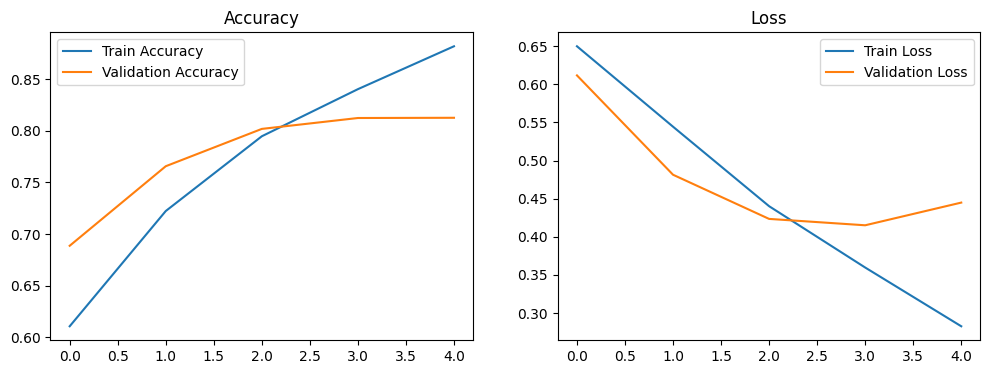

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## BONUS: Predicción de imágenes nuevas (5% extra)
* Crea una función predict_image(path)
* Carga una imagen desde disco, escálala y predice
* Muestra si es gato o perro

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


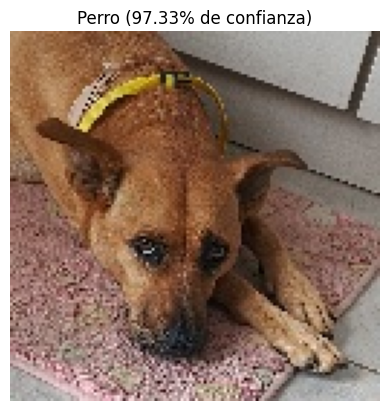

In [35]:
# 1. Cargar una imagen de prueba (reemplaza 'tu_imagen.jpg' con tu archivo)
image_path = 'images_128x128_2.jpg'  # Asegúrate de subir la imagen a Colab o tenerla en tu directorio

# 2. Preprocesar la imagen (igual que en el entrenamiento)
img = tf.keras.utils.load_img(image_path, target_size=(128, 128))  # Redimensionar
img_array = tf.keras.utils.img_to_array(img)  # Convertir a array
img_array = img_array / 255.0  # Normalizar (mismo que en format_example)
img_array = tf.expand_dims(img_array, 0)  # Añadir dimensión batch (shape [1, 128, 128, 3])

# 3. Hacer la predicción
prediction = model.predict(img_array)  # Devuelve probabilidad (ej: 0.87)

# 4. Mostrar resultado
plt.imshow(img)
plt.axis('off')

# Interpretar la predicción (sigmoid: >0.5 = perro, <0.5 = gato)
if prediction[0] > 0.5:
    plt.title(f"Perro ({prediction[0][0]*100:.2f}% de confianza)")
else:
    plt.title(f"Gato ({(1-prediction[0][0])*100:.2f}% de confianza)")

plt.show()